### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable: the word condition, whether it is congruent or incongruent.

Dependant variable: the time it takes to say the word's color.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

The null hypothesis should be the hypothesis we want to reject. In this case, our null hypothesis should be that the mean reaction time for congruent words is equal to or greater than the mean reaction time for incongruent words. This is a one-tailed test.

The alternative hypothesis is that the mean reaction time for congruent words less than the mean reaction time for incongruent words

H0: μC ≥ μI

HA: μC < μI

μC - mean reaction time for congruent word colors
μI - mean reaction time for incongruent word colors

We will be using a t-statistic to test our hypothesis, because the sample size is less than 30. A z-statistic would be inappropirate because the distrubution can no longer be approximated to be normal when the sample size is less than 30. Also, the population mean and variance is unknown.

This is a paired t-test. This is why we are using the delta betwen both congruent and incongruent reaction times. A paired t-test is used when we want to compare two populations that have observations that can be paired with each other.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [8]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#Import the data
df=pd.read_csv('stroopdata.csv')
#df.head()

#Add a delta column
df['Delta']=df['Incongruent'] - df['Congruent']
#df.head()

#Analyze data
delta_stats = np.mean(df['Delta']), np.std(df['Delta'])
print(delta_stats)
df.shape

(7.964791666666667, 4.762398030222158)


(24, 3)

Central tendency: Delta mean is about 8secs
Variability: Delta standard deviation is 4.8secs

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

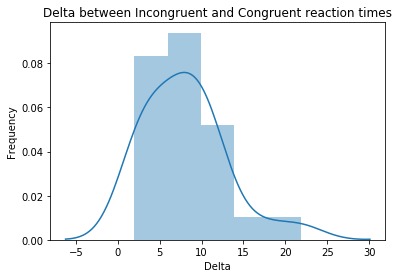

In [7]:
import seaborn as sb

plt.xlabel("Delta(secs)")
plt.ylabel("Frequency")
plt.title("Delta between Incongruent and Congruent reaction times")
ax = sb.distplot(df['Delta'])

There is a definite skrew to the right side of 0, suggested that the incongruent reactions times are usually longer, giving basis to the alternative hypothesis.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [13]:
# Perform the statistical test here
t_test = (0-np.mean(df['Delta']))/(np.std(df['Delta'])/23**0.5)
print(t_test)

-8.020706944109959


Assume:

Confidence interval of: 99%
Type 1 error: 0.01%
Population size(n)= 24
Degrees of freedom (n-1) = 23
t_test = -8.02
t_threshold = -2.5
https://en.wikipedia.org/wiki/Student%27s_t-distribution

Since t test value is significantly lower than that t treshold for a one-sided t-test given 23 degrees of freedom, we can reject the null hypothesis.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

This test is based on the way people read the words. The change in color that is incogurent with the words causes the brain to get confused, which slows down reaction time. I found that concentrating on the edge or middle of the word helped my reaction time.

Sources:
[1] t-table: https://en.wikipedia.org/wiki/Student%27s_t-distribution
[2] z-statistics vs. t-statistics: https://www.khanacademy.org/math/statistics-probability/significance-tests-one-sample/more-significance-testing-videos/v/small-sample-hypothesis-test